<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.4_n20.csv',
 'data_multi_delta_-2.4_n30.csv',
 'data_multi_delta_-2.4_n60.csv',
 'data_multi_delta_-2.4_n120.csv',
 'data_multi_delta_-2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.438322,99.266218,0.000385,187.704925,187.703958,0.000967
1,0.0,1.0,62.881943,76.163066,-0.009877,149.035132,149.045654,-0.010523
2,0.0,2.0,37.005254,42.762451,-0.017672,89.750033,89.769861,-0.019828
3,0.0,3.0,40.734855,97.093206,0.001419,147.829479,147.824766,0.004713
4,0.0,4.0,94.418715,95.989829,-0.005185,200.403359,200.409555,-0.006196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.823134,29.384592,-0.009973,94.197753,94.212359,-0.014605
19996,999.0,16.0,38.426324,87.106766,-0.003317,135.529773,135.532159,-0.002386
19997,999.0,17.0,54.531743,93.890668,-0.000561,158.421850,158.419466,0.002384
19998,999.0,18.0,79.802793,65.434285,-0.012497,155.224581,155.235581,-0.011000


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.438322,99.266218,0.000385,187.704925,187.703958,0.000967
1,0.0,1.0,62.881943,76.163066,-0.009877,149.035132,149.045654,-0.010523
2,0.0,2.0,37.005254,42.762451,-0.017672,89.750033,89.769861,-0.019828
3,0.0,3.0,40.734855,97.093206,0.001419,147.829479,147.824766,0.004713
4,0.0,4.0,94.418715,95.989829,-0.005185,200.403359,200.409555,-0.006196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.823134,29.384592,-0.009973,94.197753,94.212359,-0.014605
19996,999.0,16.0,38.426324,87.106766,-0.003317,135.529773,135.532159,-0.002386
19997,999.0,17.0,54.531743,93.890668,-0.000561,158.421850,158.419466,0.002384
19998,999.0,18.0,79.802793,65.434285,-0.012497,155.224581,155.235581,-0.011000


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,78.438322,99.266218,0.000385,187.704925,187.703958,0.000967
1,0.0,1.0,62.881943,76.163066,-0.009877,149.035132,149.045654,-0.010523
2,0.0,2.0,37.005254,42.762451,-0.017672,89.750033,89.769861,-0.019828
3,0.0,3.0,40.734855,97.093206,0.001419,147.829479,147.824766,0.004713
4,0.0,4.0,94.418715,95.989829,-0.005185,200.403359,200.409555,-0.006196
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,54.823134,29.384592,-0.009973,94.197753,94.212359,-0.014605
19996,999.0,16.0,38.426324,87.106766,-0.003317,135.529773,135.532159,-0.002386
19997,999.0,17.0,54.531743,93.890668,-0.000561,158.421850,158.419466,0.002384
19998,999.0,18.0,79.802793,65.434285,-0.012497,155.224581,155.235581,-0.011000


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    78.438322  99.266218  0.000385  187.704925  187.703958  0.000967
      1.0    62.881943  76.163066 -0.009877  149.035132  149.045654 -0.010523
      2.0    37.005254  42.762451 -0.017672   89.750033   89.769861 -0.019828
      3.0    40.734855  97.093206  0.001419  147.829479  147.824766  0.004713
      4.0    94.418715  95.989829 -0.005185  200.403359  200.409555 -0.006196
...                ...        ...       ...         ...         ...       ...
999.0 15.0   54.823134  29.384592 -0.009973   94.197753   94.212359 -0.014605
      16.0   38.426324  87.106766 -0.003317  135.529773  135.532159 -0.002386
      17.0   54.531743  93.890668 -0.000561  158.421850  158.419466  0.002384
      18.0   79.802793  65.434285 -0.012497  155.224581  155.235581 -0.011000
      19.0   89.117016  52.844325  0.012218  151.973559  151.960625  0.012934

[20000 rows x 6 columns]

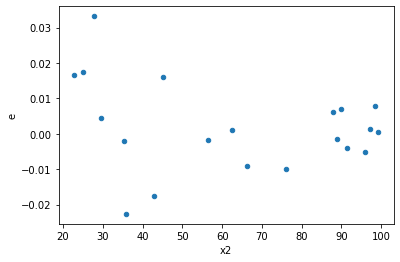

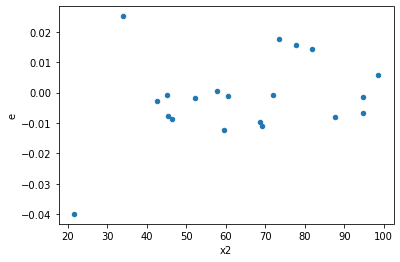

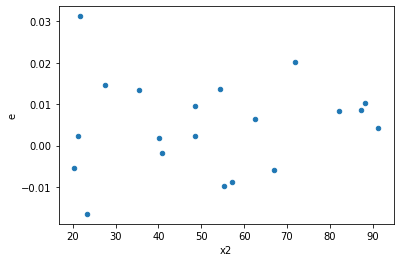

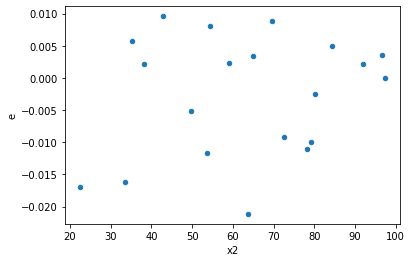

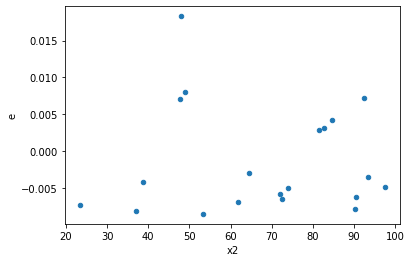

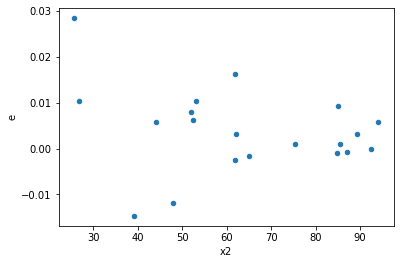

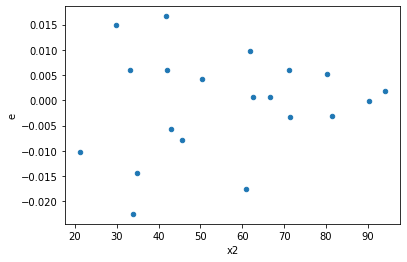

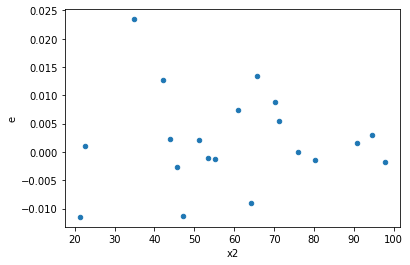

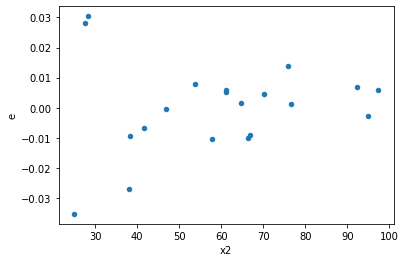

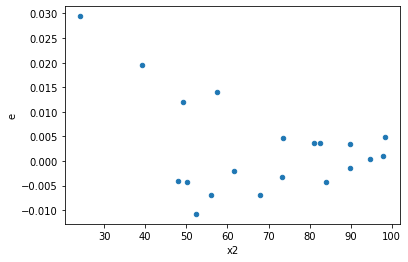

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,0.0006363772439748357,0.00077289411661291,0.00010606287399580595,0.00012881568610215166,1.2145219269397267,0.8195008248065876,0.5902495875967062,0.4097504124032938,Reject001=1 : Homoscedasticity
17.0,6.0,6.0,0.00029897833166719163,0.0004781102890843026,4.982972194453194e-05,7.96850481807171e-05,1.5991469562968599,0.5828484675466004,0.7085757662266998,0.2914242337733002,Reject001=1 : Homoscedasticity
39.0,6.0,6.0,0.00021130757406912428,0.0003508514558696055,3.521792901152071e-05,5.8475242644934254e-05,1.6603827733824286,0.5533371658442592,0.7233314170778704,0.2766685829221296,Reject001=1 : Homoscedasticity
43.0,6.0,6.0,0.0001238524082438617,0.0002892760513210133,2.0642068040643618e-05,4.821267522016888e-05,2.3356514049483588,0.3256085771575421,0.837195711421229,0.16280428857877105,Reject001=1 : Homoscedasticity
44.0,6.0,6.0,0.00020882516067770456,0.00038433620142626406,3.480419344628409e-05,6.405603357104401e-05,1.840468840914428,0.4767361428985559,0.761631928550722,0.23836807144927796,Reject001=1 : Homoscedasticity
47.0,6.0,6.0,0.0006690970778492105,0.0006808199015633128,0.00011151617964153508,0.00011346998359388546,1.017520363041765,0.983718117671676,0.508140941164162,0.491859058835838,Reject001=1 : Homoscedasticity
61.0,6.0,6.0,0.0003230510470312831,0.0012745360221384473,5.384184117188052e-05,0.00021242267035640787,3.9453084391799718,0.11926559936891157,0.9403672003155442,0.059632799684455784,Reject001=1 : Homoscedasticity
87.0,6.0,6.0,0.0004969731702626981,0.0005304531395329758,8.282886171044969e-05,8.840885658882931e-05,1.067367760019279,0.9389440225649119,0.530527988717544,0.46947201128245597,Reject001=1 : Homoscedasticity
102.0,6.0,6.0,6.713233370726819e-05,0.00010083983998136539,1.1188722284544698e-05,1.680663999689423e-05,1.5021053851796575,0.6337171124125032,0.6831414437937484,0.3168585562062516,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.0019105252267169034,0.00019829622273194526,0.0003184208711194839,3.304937045532421e-05,0.10379147051237982,0.014371333187125997,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.0006363772439748357,0.00077289411661291,0.00010606287399580595,0.00012881568610215166,1.2145219269397267,0.8195008248065876,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.0007517788712912448,0.00048780673805282044,0.0001252964785485408,8.13011230088034e-05,0.6488699758413939,0.6126222462793603,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.0008031449986621725,0.0001913896438567882,0.00013385749977702874,3.1898273976131365e-05,0.23830023741116838,0.10455867583890584,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.0005483160839538584,0.0002326566516648841,9.138601399230973e-05,3.8776108610814017e-05,0.4243111928930075,0.3206420545725353,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,0.0005664104402337388,5.569388526958259e-05,9.440174003895647e-05,9.282314211597098e-06,0.09832778726077077,0.012492297110002385,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.0009611197980669726,0.0005476027003701314,0.0001601866330111621,9.126711672835523e-05,0.5697548853654697,0.5112492315294027,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.0010709149768640643,3.8143809432782205e-05,0.00017848582947734405,6.357301572130367e-06,0.03561796244971552,0.0007722532521638985,Reject001=0 : Heteroscedasticity
8.0,6.0,6.0,0.001039358366325721,0.0005062008172525967,0.00017322639438762018,8.436680287543279e-05,0.48703203212005525,0.4026785243529829,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      756
Reject001=0 : Heteroscedasticity    244
Name: Result_test, dtype: int64